## Victorian Road Crash Statistics and Analysis

Road statistics are well reported, but are there trends and relationships around preventative measures such as speed limit restrictions, road upgrades and road safety cameras.  We will be asking which one is the most effective at preventing incidents and what type of incidents.  

We will be diving into the data to see if our hypothesis that road upgrades are likely to be the most effective.

Key questions to be considered are:
* Is there a correlation between the number and type of road incidents and the speed limit?  Eg - Fatalities / Serious injury / Minor or no injury as classified by VicRoads.
* Does local government spending improve road conditions to prevent incidents? 
* Does the overall demographics (age / average income / gender) of local government areas have an impact on the number of incidents?
* Do speed camera locations actually decrease crash numbers within a radius of 1km from the incidents v those outside 1 km of the speed camera?


In [1]:
#Import dependencies
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats

pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)


In [2]:
#Import the inital CSV
crash_data = pd.read_csv("Resources/Crash_Statistics_Victoria_clean.csv")
crash_data.head()

,OBJECTID,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,NODE_ID,LONGITUDE,LATITUDE,NODE_TYPE,LGA_NAME,REGION_NAME,VICGRID_X,VICGRID_Y,TOTAL_PERSONS,INJ_OR_FATAL,FATALITY,SERIOUSINJURY,OTHERINJURY,NONINJURED,MALES,FEMALES,BICYCLIST,PASSENGER,DRIVER,PEDESTRIAN,PILLION,MOTORIST,UNKNOWN,PED_CYCLIST_5_12,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,RMA,STAT_DIV_NAME
0,3401744,1/07/2013,18.30.00,Yes,Struck Pedestrian,Monday,Dark Street lights on,Not at intersection,Serious injury accident,60 km/hr,261534,144.96980,-37.82202,Non-Intersection,MELBOURNE,METROPOLITAN NORTH WEST REGION,2497341.176,2408778.118,3,1,0,1,0,2,2,1,0,1,1,1,0,0,0,0,0,0,0,0,No,0,1,0,1,0,0,Local Road,Metro
1,3401745,2/07/2013,16.40.00,No,Collision with vehicle,Tuesday,Day,T intersection,Serious injury accident,60 km/hr,66573,145.14671,-37.83166,Intersection,WHITEHORSE,METROPOLITAN SOUTH EAST REGION,2512914.561,2407698.334,2,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,0,1,1,0,No,0,3,0,3,0,0,Arterial Other,Metro
2,3401746,2/07/2013,13.15.00,No,Collision with a fixed object,Tuesday,Day,T intersection,Serious injury accident,50 km/hr,261533,144.80134,-37.74003,Intersection,BRIMBANK,METROPOLITAN NORTH WEST REGION,2482490.641,2417859.686,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,Yes,0,1,0,1,0,0,Local Road,Metro
3,3401747,2/07/2013,16.45.00,No,Collision with a fixed object,Tuesday,Day,Not at intersection,Serious injury accident,110 km/hr,263495,145.07011,-37.17891,Non-Intersection,MITCHELL,NORTHERN REGION,2506225.129,2480145.341,3,2,0,2,0,1,1,2,0,2,1,0,0,0,0,0,0,0,0,0,No,0,1,0,1,0,0,Freeway,Country
4,3401748,2/07/2013,15.48.00,No,Collision with vehicle,Tuesday,Day,Not at intersection,Other injury accident,50 km/hr,261664,144.96530,-37.81808,Non-Intersection,MELBOURNE,METROPOLITAN NORTH WEST REGION,2496944.686,2409215.737,3,1,0,0,1,2,3,0,0,1,2,0,0,0,0,0,0,0,0,0,No,0,2,0,1,0,1,Local Road,Metro


In [3]:
#check dimensions
crash_data.shape

(65435, 47)

In [4]:
#check missing values
crash_data.isnull().sum()

OBJECTID                0
ACCIDENT_DATE           0
ACCIDENT_TIME           0
ALCOHOLTIME             0
ACCIDENT_TYPE           0
DAY_OF_WEEK          1146
LIGHT_CONDITION         0
ROAD_GEOMETRY           0
SEVERITY                0
SPEED_ZONE              0
NODE_ID                 0
LONGITUDE               0
LATITUDE                0
NODE_TYPE               6
LGA_NAME                0
REGION_NAME             0
VICGRID_X               0
VICGRID_Y               0
TOTAL_PERSONS           0
INJ_OR_FATAL            0
FATALITY                0
SERIOUSINJURY           0
OTHERINJURY             0
NONINJURED              0
MALES                   0
FEMALES                 0
BICYCLIST               0
PASSENGER               0
DRIVER                  0
PEDESTRIAN              0
PILLION                 0
MOTORIST                0
UNKNOWN                 0
PED_CYCLIST_5_12        0
PED_CYCLIST_13_18       0
OLD_PEDESTRIAN          0
OLD_DRIVER              0
YOUNG_DRIVER            0
ALCOHOL_RELA

In [5]:
#remove NA values based on row
crash_data = crash_data.dropna(axis = 0)

In [6]:
#check missing values
crash_data.isnull().sum()


OBJECTID             0
ACCIDENT_DATE        0
ACCIDENT_TIME        0
ALCOHOLTIME          0
ACCIDENT_TYPE        0
DAY_OF_WEEK          0
LIGHT_CONDITION      0
ROAD_GEOMETRY        0
SEVERITY             0
SPEED_ZONE           0
NODE_ID              0
LONGITUDE            0
LATITUDE             0
NODE_TYPE            0
LGA_NAME             0
REGION_NAME          0
VICGRID_X            0
VICGRID_Y            0
TOTAL_PERSONS        0
INJ_OR_FATAL         0
FATALITY             0
SERIOUSINJURY        0
OTHERINJURY          0
NONINJURED           0
MALES                0
FEMALES              0
BICYCLIST            0
PASSENGER            0
DRIVER               0
PEDESTRIAN           0
PILLION              0
MOTORIST             0
UNKNOWN              0
PED_CYCLIST_5_12     0
PED_CYCLIST_13_18    0
OLD_PEDESTRIAN       0
OLD_DRIVER           0
YOUNG_DRIVER         0
ALCOHOL_RELATED      0
UNLICENCSED          0
NO_OF_VEHICLES       0
HEAVYVEHICLE         0
PASSENGERVEHICLE     0
MOTORCYCLE 

In [7]:
#load local government expenditure data, skip first row
localgov = pd.read_csv("Resources/lge_cleanfile.csv", skiprows = 1)
localgov.head(10)

,LGA_NAME_ALL,Local Roads - Sealed-length,Local Roads - Unsealed - Formed & Sheeted-length,Local Roads - Unsealed - Natural Surface_length,Total_roadlength,Local Roads - Sealed-expenditure,Local Roads - Unsealed - Formed & Sheeted-expenditure,Local Roads - Unsealed - Natural Surface-expenditure,Roads Ancillary-expenditure,Total-expenditure
0,Alpine,412,233,215,860,"3,748,129","265,116",0,0,"4,013,244"
1,Ararat,764,"1,420",240,"2,424","7,303,459","2,975,868","2,281","1,361,455","11,845,829"
2,Ballarat,"1,044",351,40,"1,435","41,874,084","3,196,942","363,289","1,045,194","46,775,611"
3,Banyule,538,6,1,545,"10,329,600",0,0,0,"10,329,600"
4,Bass Coast,563,373,7,943,"7,355,926","1,677,983",0,"789,457","9,923,525"
5,Baw Baw,"1,110",721,184,"2,015","13,512,590","3,092,182",0,"1,493,686","19,073,493"
6,Bayside,355,1,0,356,"5,547,236",0,0,"6,045,707","11,592,943"
7,Benalla,560,713,78,"1,351","2,504,772","1,474,785",0,0,"3,979,557"
8,Boroondara,562,0,0,562,"11,436,082",0,0,0,"11,436,082"
9,Brimbank,889,5,0,894,"25,715,082","344,474",0,"1,997,635","28,078,056"


In [8]:
#check null values
localgov.isnull().sum()

LGA_NAME_ALL                                              0
Local Roads - Sealed-length                               0
Local Roads - Unsealed - Formed &  Sheeted-length         0
Local Roads - Unsealed - Natural Surface_length           0
Total_roadlength                                          0
Local Roads - Sealed-expenditure                          0
Local Roads - Unsealed - Formed &  Sheeted-expenditure    0
Local Roads - Unsealed - Natural Surface-expenditure      0
Roads Ancillary-expenditure                               0
Total-expenditure                                         0
dtype: int64

In [9]:
#unique lGA names on local gov dataset
localgov["LGA_NAME_ALL"].nunique()
localgov["LGA_NAME_ALL"].value_counts()

Hume                     1
Central Goldfields       1
Mitchell                 1
Moorabool                1
Yarra                    1
Glen Eira                1
Manningham               1
Stonnington              1
Greater Bendigo          1
Glenelg                  1
Whitehorse               1
Surf Coast               1
Murrindindi              1
Warrnambool              1
Towong                   1
Queenscliffe             1
Wodonga                  1
Casey                    1
Moonee Valley            1
Monash                   1
Macedon Ranges           1
Latrobe                  1
Mildura                  1
Moyne                    1
Cardinia                 1
Bayside                  1
Mornington Peninsula     1
Hobsons Bay              1
Wyndham                  1
Corangamite              1
Moira                    1
Maribyrnong              1
Ararat                   1
Ballarat                 1
Swan Hill                1
Nillumbik                1
Wangaratta               1
B

In [10]:
# Load in the csv data files
LGA_demo_path = "Resources/lga_demographics.csv"

# Read the weather data 
lga_demo_df = pd.read_csv(LGA_demo_path)

In [11]:
#Check the dataframe import
lga_demo_df

,LGA Name,LGA Code,Departmental Region,City_Regional,Index of Relative Socio-Economic Disadvantage (IRSD),Index of Relative Socio-Economic Disadvantage (IRSD) (rank),Percentage of highly disadvantaged SA1s,Percentage of highly disadvantaged SA1s (rank),People with income less than $400 per week,People with income less than $400 per week (rank),Median household income,Median household income (rank),Median house price,Median house price (rank),Journeys to work which are by car,Journeys to work which are by car (rank),People with at least 2 hour daily commute,People with at least 2 hour daily commute (rank),People at increased risk of alcohol-related harm on a single occasion of drinking,People at increased risk of alcohol-related harm on a single occasion of drinking (rank),People reporting fair or poor health status,People reporting fair or poor health status (rank),"Clients that received Alcohol & Drug Treatment Services per 1,000 population","Clients that received Alcohol & Drug Treatment Services per 1,000 population (rank)",Total_pop
0,ALPINE,20110,Hume,Regional,987,35,0.238,33,0.448,21,829,67,265000,50,0.439,77,0.083,35,0.561,6,0.193,10,1.0,78,12335
1,ARARAT,20260,Grampians,Regional,951,11,0.455,8,0.433,30,844,64,193000,68,0.687,38,0.000,0,0.482,31,0.144,45,11.5,4,11599
2,BALLARAT,20570,Grampians,Regional,981,29,0.315,23,0.417,39,988,44,294000,48,0.738,15,0.047,47,0.537,15,0.123,60,5.5,31,101689
3,BANYULE,20660,Northern Metropolitan,Metro,1047,67,0.083,60,0.369,68,1394,12,620000,17,0.641,55,0.206,5,0.407,64,0.167,31,3.7,54,121869
4,BASS COAST,20740,Gippsland,Regional,978,27,0.216,36,0.438,26,855,61,340000,38,0.714,25,0.068,40,0.452,44,0.177,20,7.1,17,32806
5,BAW BAW,20830,Gippsland,Regional,998,47,0.152,54,0.415,41,1025,40,309000,44,0.699,32,0.108,25,0.429,59,0.129,58,5.1,35,48477
6,BAYSIDE,20910,Southern Metropolitan,Metro,1091,77,0.023,73,0.327,76,1826,3,1250000,3,0.627,57,0.141,20,0.505,23,0.085,78,2.8,67,97092
7,BENALLA,21010,Hume,Regional,957,16,0.297,26,0.448,22,827,69,235500,59,0.693,34,0.000,0,0.402,66,0.098,71,3.2,62,13863
8,BOROONDARA,21110,Eastern Metropolitan,Metro,1098,78,0.008,75,0.333,75,1893,1,1550000,1,0.566,68,0.055,43,0.488,28,0.103,68,2.5,70,167232
9,BRIMBANK,21180,Western Metropolitan,Metro,926,3,0.591,3,0.483,6,1106,34,405000,28,0.715,24,0.167,11,0.338,74,0.238,3,6.3,24,194315


In [12]:
lga_demo_df.dtypes

LGA Name                                                                                     object
LGA Code                                                                                      int64
Departmental Region                                                                          object
City_Regional                                                                                object
Index of Relative Socio-Economic Disadvantage (IRSD)                                          int64
Index of Relative Socio-Economic Disadvantage (IRSD) (rank)                                   int64
Percentage of highly disadvantaged SA1s                                                     float64
Percentage of highly disadvantaged SA1s (rank)                                                int64
People with income less than $400 per week                                                  float64
People with income less than $400 per week (rank)                                             int64


In [13]:
#Rename the column name LGA Name to LGA
lga_demo_df2 = lga_demo_df.rename(columns={"LGA Name": "LGA"})


In [14]:
lga_demo_df2

,LGA,LGA Code,Departmental Region,City_Regional,Index of Relative Socio-Economic Disadvantage (IRSD),Index of Relative Socio-Economic Disadvantage (IRSD) (rank),Percentage of highly disadvantaged SA1s,Percentage of highly disadvantaged SA1s (rank),People with income less than $400 per week,People with income less than $400 per week (rank),Median household income,Median household income (rank),Median house price,Median house price (rank),Journeys to work which are by car,Journeys to work which are by car (rank),People with at least 2 hour daily commute,People with at least 2 hour daily commute (rank),People at increased risk of alcohol-related harm on a single occasion of drinking,People at increased risk of alcohol-related harm on a single occasion of drinking (rank),People reporting fair or poor health status,People reporting fair or poor health status (rank),"Clients that received Alcohol & Drug Treatment Services per 1,000 population","Clients that received Alcohol & Drug Treatment Services per 1,000 population (rank)",Total_pop
0,ALPINE,20110,Hume,Regional,987,35,0.238,33,0.448,21,829,67,265000,50,0.439,77,0.083,35,0.561,6,0.193,10,1.0,78,12335
1,ARARAT,20260,Grampians,Regional,951,11,0.455,8,0.433,30,844,64,193000,68,0.687,38,0.000,0,0.482,31,0.144,45,11.5,4,11599
2,BALLARAT,20570,Grampians,Regional,981,29,0.315,23,0.417,39,988,44,294000,48,0.738,15,0.047,47,0.537,15,0.123,60,5.5,31,101689
3,BANYULE,20660,Northern Metropolitan,Metro,1047,67,0.083,60,0.369,68,1394,12,620000,17,0.641,55,0.206,5,0.407,64,0.167,31,3.7,54,121869
4,BASS COAST,20740,Gippsland,Regional,978,27,0.216,36,0.438,26,855,61,340000,38,0.714,25,0.068,40,0.452,44,0.177,20,7.1,17,32806
5,BAW BAW,20830,Gippsland,Regional,998,47,0.152,54,0.415,41,1025,40,309000,44,0.699,32,0.108,25,0.429,59,0.129,58,5.1,35,48477
6,BAYSIDE,20910,Southern Metropolitan,Metro,1091,77,0.023,73,0.327,76,1826,3,1250000,3,0.627,57,0.141,20,0.505,23,0.085,78,2.8,67,97092
7,BENALLA,21010,Hume,Regional,957,16,0.297,26,0.448,22,827,69,235500,59,0.693,34,0.000,0,0.402,66,0.098,71,3.2,62,13863
8,BOROONDARA,21110,Eastern Metropolitan,Metro,1098,78,0.008,75,0.333,75,1893,1,1550000,1,0.566,68,0.055,43,0.488,28,0.103,68,2.5,70,167232
9,BRIMBANK,21180,Western Metropolitan,Metro,926,3,0.591,3,0.483,6,1106,34,405000,28,0.715,24,0.167,11,0.338,74,0.238,3,6.3,24,194315


In [15]:
crash_demographics = crash_data.copy()

In [16]:
crash_demographics

,OBJECTID,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,NODE_ID,LONGITUDE,LATITUDE,NODE_TYPE,LGA_NAME,REGION_NAME,VICGRID_X,VICGRID_Y,TOTAL_PERSONS,INJ_OR_FATAL,FATALITY,SERIOUSINJURY,OTHERINJURY,NONINJURED,MALES,FEMALES,BICYCLIST,PASSENGER,DRIVER,PEDESTRIAN,PILLION,MOTORIST,UNKNOWN,PED_CYCLIST_5_12,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,RMA,STAT_DIV_NAME
0,3401744,1/07/2013,18.30.00,Yes,Struck Pedestrian,Monday,Dark Street lights on,Not at intersection,Serious injury accident,60 km/hr,261534,144.96980,-37.82202,Non-Intersection,MELBOURNE,METROPOLITAN NORTH WEST REGION,2497341.176,2408778.118,3,1,0,1,0,2,2,1,0,1,1,1,0,0,0,0,0,0,0,0,No,0,1,0,1,0,0,Local Road,Metro
1,3401745,2/07/2013,16.40.00,No,Collision with vehicle,Tuesday,Day,T intersection,Serious injury accident,60 km/hr,66573,145.14671,-37.83166,Intersection,WHITEHORSE,METROPOLITAN SOUTH EAST REGION,2512914.561,2407698.334,2,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,0,1,1,0,No,0,3,0,3,0,0,Arterial Other,Metro
2,3401746,2/07/2013,13.15.00,No,Collision with a fixed object,Tuesday,Day,T intersection,Serious injury accident,50 km/hr,261533,144.80134,-37.74003,Intersection,BRIMBANK,METROPOLITAN NORTH WEST REGION,2482490.641,2417859.686,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,Yes,0,1,0,1,0,0,Local Road,Metro
3,3401747,2/07/2013,16.45.00,No,Collision with a fixed object,Tuesday,Day,Not at intersection,Serious injury accident,110 km/hr,263495,145.07011,-37.17891,Non-Intersection,MITCHELL,NORTHERN REGION,2506225.129,2480145.341,3,2,0,2,0,1,1,2,0,2,1,0,0,0,0,0,0,0,0,0,No,0,1,0,1,0,0,Freeway,Country
4,3401748,2/07/2013,15.48.00,No,Collision with vehicle,Tuesday,Day,Not at intersection,Other injury accident,50 km/hr,261664,144.96530,-37.81808,Non-Intersection,MELBOURNE,METROPOLITAN NORTH WEST REGION,2496944.686,2409215.737,3,1,0,0,1,2,3,0,0,1,2,0,0,0,0,0,0,0,0,0,No,0,2,0,1,0,1,Local Road,Metro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65430,3467273,22/05/2018,15.44.00,No,Collision with vehicle,Tuesday,Day,Cross intersection,Other injury accident,60 km/hr,50677,142.47990,-38.37638,Intersection,WARRNAMBOOL,SOUTH WESTERN REGION,2279784.781,2344328.146,4,1,0,0,1,3,1,3,0,2,2,0,0,0,0,0,0,0,0,1,No,0,2,0,2,0,0,Arterial Highway,Country
65431,3467274,22/05/2018,17.32.00,No,Collision with vehicle,Tuesday,Dusk/Dawn,Not at intersection,Other injury accident,70 km/hr,331087,145.06291,-38.23802,Non-Intersection,MORNINGTON PENINSULA,METROPOLITAN SOUTH EAST REGION,2505508.040,2362601.303,4,1,0,0,1,3,1,3,0,1,3,0,0,0,0,0,0,0,0,0,No,0,3,0,3,0,0,Arterial Other,Metro
65432,3467275,22/05/2018,17.26.00,No,Collision with vehicle,Tuesday,Dark No street lights,Not at intersection,Other injury accident,60 km/hr,330794,145.33214,-38.09255,Non-Intersection,CASEY,METROPOLITAN SOUTH EAST REGION,2529136.402,2378700.466,2,1,0,0,1,1,2,0,0,0,2,0,0,0,0,0,0,0,1,0,No,0,2,1,1,0,0,Arterial Other,Metro
65433,3467276,13/12/2017,16.35.00,No,Vehicle overturned (no collision),Wednesday,Day,T intersection,Other injury accident,50 km/hr,332622,145.16357,-38.10343,Intersection,FRANKSTON,METROPOLITAN SOUTH EAST REGION,2514347.419,2377531.219,2,1,0,0,1,1,2,0,0,0,1,0,0,1,0,0,0,0,0,0,No,0,2,0,1,1,0,Local Road,Metro


In [17]:
#Delete the row with a MOUNT BULLER ALPINE RESOR Statistic
crash_demographics[crash_demographics.LGA_NAME != 'MOUNT BULLER ALPINE RESOR']

,OBJECTID,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,NODE_ID,LONGITUDE,LATITUDE,NODE_TYPE,LGA_NAME,REGION_NAME,VICGRID_X,VICGRID_Y,TOTAL_PERSONS,INJ_OR_FATAL,FATALITY,SERIOUSINJURY,OTHERINJURY,NONINJURED,MALES,FEMALES,BICYCLIST,PASSENGER,DRIVER,PEDESTRIAN,PILLION,MOTORIST,UNKNOWN,PED_CYCLIST_5_12,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,RMA,STAT_DIV_NAME
0,3401744,1/07/2013,18.30.00,Yes,Struck Pedestrian,Monday,Dark Street lights on,Not at intersection,Serious injury accident,60 km/hr,261534,144.96980,-37.82202,Non-Intersection,MELBOURNE,METROPOLITAN NORTH WEST REGION,2497341.176,2408778.118,3,1,0,1,0,2,2,1,0,1,1,1,0,0,0,0,0,0,0,0,No,0,1,0,1,0,0,Local Road,Metro
1,3401745,2/07/2013,16.40.00,No,Collision with vehicle,Tuesday,Day,T intersection,Serious injury accident,60 km/hr,66573,145.14671,-37.83166,Intersection,WHITEHORSE,METROPOLITAN SOUTH EAST REGION,2512914.561,2407698.334,2,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,0,1,1,0,No,0,3,0,3,0,0,Arterial Other,Metro
2,3401746,2/07/2013,13.15.00,No,Collision with a fixed object,Tuesday,Day,T intersection,Serious injury accident,50 km/hr,261533,144.80134,-37.74003,Intersection,BRIMBANK,METROPOLITAN NORTH WEST REGION,2482490.641,2417859.686,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,Yes,0,1,0,1,0,0,Local Road,Metro
3,3401747,2/07/2013,16.45.00,No,Collision with a fixed object,Tuesday,Day,Not at intersection,Serious injury accident,110 km/hr,263495,145.07011,-37.17891,Non-Intersection,MITCHELL,NORTHERN REGION,2506225.129,2480145.341,3,2,0,2,0,1,1,2,0,2,1,0,0,0,0,0,0,0,0,0,No,0,1,0,1,0,0,Freeway,Country
4,3401748,2/07/2013,15.48.00,No,Collision with vehicle,Tuesday,Day,Not at intersection,Other injury accident,50 km/hr,261664,144.96530,-37.81808,Non-Intersection,MELBOURNE,METROPOLITAN NORTH WEST REGION,2496944.686,2409215.737,3,1,0,0,1,2,3,0,0,1,2,0,0,0,0,0,0,0,0,0,No,0,2,0,1,0,1,Local Road,Metro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65430,3467273,22/05/2018,15.44.00,No,Collision with vehicle,Tuesday,Day,Cross intersection,Other injury accident,60 km/hr,50677,142.47990,-38.37638,Intersection,WARRNAMBOOL,SOUTH WESTERN REGION,2279784.781,2344328.146,4,1,0,0,1,3,1,3,0,2,2,0,0,0,0,0,0,0,0,1,No,0,2,0,2,0,0,Arterial Highway,Country
65431,3467274,22/05/2018,17.32.00,No,Collision with vehicle,Tuesday,Dusk/Dawn,Not at intersection,Other injury accident,70 km/hr,331087,145.06291,-38.23802,Non-Intersection,MORNINGTON PENINSULA,METROPOLITAN SOUTH EAST REGION,2505508.040,2362601.303,4,1,0,0,1,3,1,3,0,1,3,0,0,0,0,0,0,0,0,0,No,0,3,0,3,0,0,Arterial Other,Metro
65432,3467275,22/05/2018,17.26.00,No,Collision with vehicle,Tuesday,Dark No street lights,Not at intersection,Other injury accident,60 km/hr,330794,145.33214,-38.09255,Non-Intersection,CASEY,METROPOLITAN SOUTH EAST REGION,2529136.402,2378700.466,2,1,0,0,1,1,2,0,0,0,2,0,0,0,0,0,0,0,1,0,No,0,2,1,1,0,0,Arterial Other,Metro
65433,3467276,13/12/2017,16.35.00,No,Vehicle overturned (no collision),Wednesday,Day,T intersection,Other injury accident,50 km/hr,332622,145.16357,-38.10343,Intersection,FRANKSTON,METROPOLITAN SOUTH EAST REGION,2514347.419,2377531.219,2,1,0,0,1,1,2,0,0,0,1,0,0,1,0,0,0,0,0,0,No,0,2,0,1,1,0,Local Road,Metro


### Final tidy up of the data to get ready for analysis

In [18]:
#Create a new DataFrame to enable work below (cleaned)
crash_demographic_clean = crash_demographics[["OBJECTID", "LGA_NAME", "TOTAL_PERSONS", "INJ_OR_FATAL", "FATALITY", "SERIOUSINJURY", "OTHERINJURY", "NONINJURED", "ALCOHOL_RELATED", "MALES", "FEMALES", "OLD_DRIVER", "YOUNG_DRIVER"]]


In [19]:
#Group data to calculate the number of crashes per LGA (excluding alcohol related crashes)
LGA_crash_count = crash_demographic_clean.groupby(["LGA_NAME"])["OBJECTID"].count()
LGA_total_inj = crash_demographic_clean.groupby(["LGA_NAME"])["TOTAL_PERSONS"].sum()
LGA_total_inj_or_fatal = crash_demographic_clean.groupby(["LGA_NAME"])["INJ_OR_FATAL"].sum()
LGA_total_fatal = crash_demographic_clean.groupby(["LGA_NAME"])["FATALITY"].sum()
LGA_total_serious = crash_demographic_clean.groupby(["LGA_NAME"])["SERIOUSINJURY"].sum()
LGA_total_minor = crash_demographic_clean.groupby(["LGA_NAME"])["OTHERINJURY"].sum()
LGA_total_no_injury = crash_demographic_clean.groupby(["LGA_NAME"])["NONINJURED"].sum()
LGA_total_male = crash_demographic_clean.groupby(["LGA_NAME"])["MALES"].sum()
LGA_total_female = crash_demographic_clean.groupby(["LGA_NAME"])["FEMALES"].sum()
LGA_total_old = crash_demographic_clean.groupby(["LGA_NAME"])["OLD_DRIVER"].sum()
LGA_total_young = crash_demographic_clean.groupby(["LGA_NAME"])["YOUNG_DRIVER"].sum()

In [20]:
#Calculate the number of alcohol related crashes and group by lGA 
LGA_count_alcohol = crash_demographic_clean.loc[crash_demographic_clean["ALCOHOL_RELATED"] == "Yes"]
LGA_total_alcohol = LGA_count_alcohol.groupby(["LGA_NAME"])["ALCOHOL_RELATED"].count()

In [21]:
#Create a new grouped dataframe 
grouped_LGA_totals = pd.DataFrame({"total_crashes": LGA_crash_count,
                                  "total_inj": LGA_total_inj,
                                  "inj_fatal": LGA_total_inj_or_fatal,
                                   "fatal": LGA_total_fatal,
                                   "serious": LGA_total_serious,
                                   "minor": LGA_total_minor,
                                   "no_inj": LGA_total_no_injury,
                                   "alcohol": LGA_total_alcohol,
                                   "male": LGA_total_male,
                                   "female": LGA_total_female,
                                   "old_driver": LGA_total_old,
                                   "young_driver": LGA_total_young
                                  })

In [22]:
#Replace the NaN in the file with a 0
grouped_LGA_totals["alcohol"] = grouped_LGA_totals["alcohol"].fillna(0)

In [23]:
#Set the index
group_LGA = grouped_LGA_totals.rename_axis("LGA").reset_index()

In [24]:
group_LGA.head(50)

,LGA,total_crashes,total_inj,inj_fatal,fatal,serious,minor,no_inj,alcohol,male,female,old_driver,young_driver
0,ALPINE,227,437,281,4,93,184,156,6.0,274,147,19,27
1,ARARAT,150,344,221,8,71,142,123,5.0,207,132,13,35
2,BALLARAT,1134,2918,1531,20,316,1195,1387,56.0,1412,1345,101,406
3,BANYULE,909,2224,1127,10,247,870,1097,18.0,1158,973,81,289
4,BASS COAST,340,878,485,11,142,332,393,20.0,470,386,32,95
5,BAW BAW,780,1404,950,16,292,642,454,28.0,848,515,37,208
6,BAYSIDE,799,1882,964,12,290,662,918,20.0,1028,793,107,177
7,BENALLA,192,484,249,10,96,143,235,5.0,267,200,21,52
8,BENDIGO,1282,2941,1610,23,426,1161,1331,53.0,1522,1307,104,432
9,BOROONDARA,1440,3312,1630,14,384,1232,1682,37.0,1791,1368,117,358


In [25]:
#Merge the Database to do the demographics analysis
LGA_merged = pd.merge(lga_demo_df2, group_LGA, how="outer", on="LGA")

In [26]:
LGA_merged

,LGA,LGA Code,Departmental Region,City_Regional,Index of Relative Socio-Economic Disadvantage (IRSD),Index of Relative Socio-Economic Disadvantage (IRSD) (rank),Percentage of highly disadvantaged SA1s,Percentage of highly disadvantaged SA1s (rank),People with income less than $400 per week,People with income less than $400 per week (rank),Median household income,Median household income (rank),Median house price,Median house price (rank),Journeys to work which are by car,Journeys to work which are by car (rank),People with at least 2 hour daily commute,People with at least 2 hour daily commute (rank),People at increased risk of alcohol-related harm on a single occasion of drinking,People at increased risk of alcohol-related harm on a single occasion of drinking (rank),People reporting fair or poor health status,People reporting fair or poor health status (rank),"Clients that received Alcohol & Drug Treatment Services per 1,000 population","Clients that received Alcohol & Drug Treatment Services per 1,000 population (rank)",Total_pop,total_crashes,total_inj,inj_fatal,fatal,serious,minor,no_inj,alcohol,male,female,old_driver,young_driver
0,ALPINE,20110,Hume,Regional,987,35,0.238,33,0.448,21,829,67,265000,50,0.439,77,0.083,35,0.561,6,0.193,10,1.0,78,12335,227,437,281,4,93,184,156,6.0,274,147,19,27
1,ARARAT,20260,Grampians,Regional,951,11,0.455,8,0.433,30,844,64,193000,68,0.687,38,0.000,0,0.482,31,0.144,45,11.5,4,11599,150,344,221,8,71,142,123,5.0,207,132,13,35
2,BALLARAT,20570,Grampians,Regional,981,29,0.315,23,0.417,39,988,44,294000,48,0.738,15,0.047,47,0.537,15,0.123,60,5.5,31,101689,1134,2918,1531,20,316,1195,1387,56.0,1412,1345,101,406
3,BANYULE,20660,Northern Metropolitan,Metro,1047,67,0.083,60,0.369,68,1394,12,620000,17,0.641,55,0.206,5,0.407,64,0.167,31,3.7,54,121869,909,2224,1127,10,247,870,1097,18.0,1158,973,81,289
4,BASS COAST,20740,Gippsland,Regional,978,27,0.216,36,0.438,26,855,61,340000,38,0.714,25,0.068,40,0.452,44,0.177,20,7.1,17,32806,340,878,485,11,142,332,393,20.0,470,386,32,95
5,BAW BAW,20830,Gippsland,Regional,998,47,0.152,54,0.415,41,1025,40,309000,44,0.699,32,0.108,25,0.429,59,0.129,58,5.1,35,48477,780,1404,950,16,292,642,454,28.0,848,515,37,208
6,BAYSIDE,20910,Southern Metropolitan,Metro,1091,77,0.023,73,0.327,76,1826,3,1250000,3,0.627,57,0.141,20,0.505,23,0.085,78,2.8,67,97092,799,1882,964,12,290,662,918,20.0,1028,793,107,177
7,BENALLA,21010,Hume,Regional,957,16,0.297,26,0.448,22,827,69,235500,59,0.693,34,0.000,0,0.402,66,0.098,71,3.2,62,13863,192,484,249,10,96,143,235,5.0,267,200,21,52
8,BOROONDARA,21110,Eastern Metropolitan,Metro,1098,78,0.008,75,0.333,75,1893,1,1550000,1,0.566,68,0.055,43,0.488,28,0.103,68,2.5,70,167232,1440,3312,1630,14,384,1232,1682,37.0,1791,1368,117,358
9,BRIMBANK,21180,Western Metropolitan,Metro,926,3,0.591,3,0.483,6,1106,34,405000,28,0.715,24,0.167,11,0.338,74,0.238,3,6.3,24,194315,1960,5160,2446,33,633,1780,2714,61.0,2864,1988,92,653


In [27]:
#Add in additional column to represent the total crashes per person in Victoria
LGA_merged["crash_per_person"] = LGA_merged["total_crashes"] / LGA_merged["Total_pop"]

In [90]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
LGA_merged.to_csv("lgamerged.csv", encoding="utf-8", index=False)

### Calculate and plot the overall statistics for the number of crashes per Local Government Agency

In [29]:
#Show the overall general statistics for a quick perusal
LGA_merged.describe()

,LGA Code,Index of Relative Socio-Economic Disadvantage (IRSD),Index of Relative Socio-Economic Disadvantage (IRSD) (rank),Percentage of highly disadvantaged SA1s,Percentage of highly disadvantaged SA1s (rank),People with income less than $400 per week,People with income less than $400 per week (rank),Median household income,Median household income (rank),Median house price,Median house price (rank),Journeys to work which are by car,Journeys to work which are by car (rank),People with at least 2 hour daily commute,People with at least 2 hour daily commute (rank),People at increased risk of alcohol-related harm on a single occasion of drinking,People at increased risk of alcohol-related harm on a single occasion of drinking (rank),People reporting fair or poor health status,People reporting fair or poor health status (rank),"Clients that received Alcohol & Drug Treatment Services per 1,000 population","Clients that received Alcohol & Drug Treatment Services per 1,000 population (rank)",Total_pop,total_crashes,total_inj,inj_fatal,fatal,serious,minor,no_inj,alcohol,male,female,old_driver,young_driver,crash_per_person
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,7.900000e+01,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,24030.632911,996.746835,40.012658,0.230633,39.898734,0.414823,40.000000,1102.607595,39.949367,4.342945e+05,39.924051,0.656063,40.000000,0.080000,23.063291,0.460152,40.000000,0.152430,40.000000,5.394937,39.000000,74913.126582,797.936709,1905.493671,1009.607595,15.531646,274.265823,719.810127,895.886076,27.430380,1051.468354,760.493671,51.468354,240.291139,0.012403
std,2165.418975,44.637419,22.952847,0.167600,22.838673,0.052703,22.949219,289.089039,22.908905,3.084959e+05,22.890359,0.094585,22.949219,0.070697,19.984187,0.077562,22.949219,0.041178,22.949219,3.169401,22.949219,68775.865562,710.101570,1828.456291,870.186945,8.378598,214.450025,659.973097,966.182947,20.736246,1000.340145,725.126866,45.871011,231.745005,0.005436
min,20110.000000,895.000000,1.000000,0.000000,1.000000,0.241000,1.000000,685.000000,1.000000,9.000000e+04,1.000000,0.268000,1.000000,0.000000,0.000000,0.260000,1.000000,0.084000,1.000000,0.000000,0.000000,2854.000000,8.000000,20.000000,9.000000,0.000000,2.000000,7.000000,11.000000,0.000000,11.000000,8.000000,2.000000,2.000000,0.002803
25%,22210.000000,964.500000,20.500000,0.089500,20.500000,0.378000,20.500000,882.000000,20.500000,2.327500e+05,20.500000,0.621500,20.500000,0.012000,1.500000,0.428000,20.500000,0.126000,20.500000,3.400000,19.500000,16003.000000,223.500000,463.500000,310.000000,9.500000,97.000000,183.500000,150.500000,11.500000,273.500000,180.000000,16.000000,56.500000,0.009294
50%,24210.000000,993.000000,40.000000,0.212000,40.000000,0.417000,40.000000,1025.000000,40.000000,3.300020e+05,40.000000,0.687000,40.000000,0.068000,20.000000,0.457000,40.000000,0.150000,40.000000,4.800000,39.000000,45041.000000,573.000000,1223.000000,749.000000,15.000000,237.000000,480.000000,417.000000,22.000000,708.000000,483.000000,32.000000,158.000000,0.010650
75%,25945.000000,1025.000000,59.500000,0.354500,59.500000,0.449000,59.500000,1297.500000,59.000000,5.895000e+05,59.500000,0.720000,59.500000,0.141000,40.500000,0.525000,59.500000,0.175500,59.500000,6.500000,58.500000,128006.500000,1286.500000,3061.000000,1588.000000,21.000000,385.500000,1172.500000,1476.000000,39.500000,1640.000000,1303.000000,83.000000,363.000000,0.013950
max,27630.000000,1098.000000,79.000000,0.767000,76.000000,0.542000,79.000000,1893.000000,79.000000,1.550000e+06,78.000000,0.766000,79.000000,0.262000,60.000000,0.599000,79.000000,0.291000,79.000000,20.600000,78.000000,299296.000000,3593.000000,8942.000000,4155.000000,35.000000,974.000000,3162.000000,4787.000000,97.000000,5233.00

In [30]:
#Show some of the sums of columns for the presentation:
sumcrash = LGA_merged["total_crashes"].sum()
sumfatalities = LGA_merged["inj_fatal"].sum()
sumfatal = LGA_merged["fatal"].sum()
sumalcohol = LGA_merged["alcohol"].sum()

print("The total crashes are: ", sumcrash)
print("The total number of serious injuries and fatalities from crashes are: ", sumfatalities)
print("The total number of fatalities from crashes are: ", sumfatal)
print("The total alcohol related crashes are: ", sumalcohol)

The total crashes are:  63037
The total number of serious injuries and fatalities from crashes are:  79759
The total number of fatalities from crashes are:  1227
The total alcohol related crashes are:  2167.0


In [31]:
#Create a copy of the DF and then sort the values by total crashes in ascending by LGA
total_lga_plot = LGA_merged.copy()
total_lga_plot = total_lga_plot.sort_values("total_crashes")

In [32]:
#Calculate the average crashes for plotting
average_crash_plot = int(total_lga_plot["total_crashes"].mean())
print("Ave crashes per LGA: ", average_crash_plot)

Ave crashes per LGA:  797


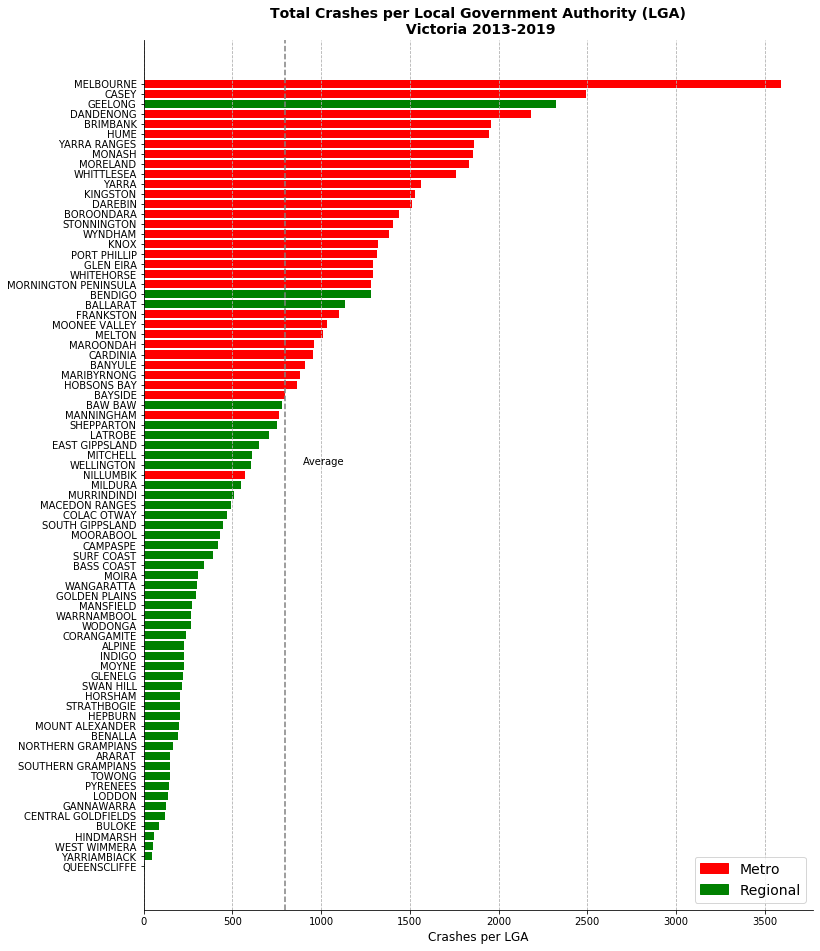

In [33]:
#Create a horizonal plot by LGA
plt.figure(figsize=(12,16))
colours = np.where(total_lga_plot["City_Regional"] == "Metro", "r", "g")
plt.barh(total_lga_plot["LGA"], total_lga_plot["total_crashes"], color=colours)

plt.title('Total Crashes per Local Government Authority (LGA)\n Victoria 2013-2019', fontsize=14, fontweight="bold")
plt.xlabel("Crashes per LGA", fontsize=12)

metro_patch_legend = mpatches.Patch(color="red", label="Metro")
regional_patch_legend = mpatches.Patch(color="green", label="Regional")
plt.legend(handles=[metro_patch_legend, regional_patch_legend], loc="lower right", fontsize=14)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.axvline(x=797, label='Average', c="grey", linestyle="--")
plt.annotate('Average',(900,40))

plt.gca().xaxis.grid(True, linestyle='--')

plt.savefig("../total_crashes.png")
plt.show()

### Visualise the spread of the dataset for total crashes in LGA's

In [34]:
#Explore the key stats for a box and whisker
crashesQ1 = np.percentile(LGA_merged["total_crashes"], 25, interpolation = 'midpoint') 
crashesQ2 = np.percentile(LGA_merged["total_crashes"], 50, interpolation = 'midpoint') 
crashesQ3 = np.percentile(LGA_merged["total_crashes"], 75, interpolation = 'midpoint') 

IQR_crashes = st.iqr(LGA_merged["total_crashes"], interpolation = 'midpoint')
IQRUp_crashes = crashesQ3 + (1.5 * IQR_crashes)
IQRDown_crashes = crashesQ1 - (1.5 * IQR_crashes)

print('Q1 25 percentile of the given data is, ', crashesQ1) 
print('Q1 50 percentile of the given data is, ', crashesQ2) 
print('Q1 75 percentile of the given data is, ', crashesQ3) 

print('Interquartile range is', IQR_crashes)
print('The upper limit for outliers is,', IQRUp_crashes)
print('The lower limit for outliers is,', IQRDown_crashes)

Q1 25 percentile of the given data is,  223.5
Q1 50 percentile of the given data is,  573.0
Q1 75 percentile of the given data is,  1286.5
Interquartile range is 1063.0
The upper limit for outliers is, 2881.0
The lower limit for outliers is, -1371.0


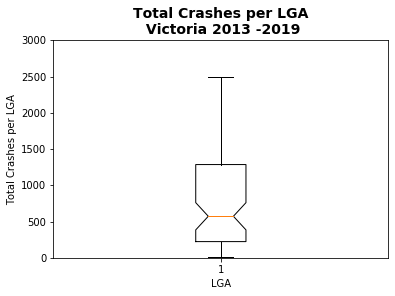

In [35]:
#Explore on a box and whisker
green_diamond = dict(markerfacecolor='g', marker='D')
crashes1, crashes_ax1 = plt.subplots()
crashes_ax1.set_title('Total Crashes per LGA\n Victoria 2013 -2019', fontsize=14, fontweight="bold")
crashes_ax1.set_ylabel('Total Crashes per LGA')
crashes_ax1.set_xlabel('LGA')

crashes_ax1.boxplot(LGA_merged["total_crashes"], notch=True, flierprops=green_diamond)
plt.ylim(0,3000)
plt.show()

Create some sub df's breaking down metro and regional for plotting purposes

In [36]:
#Split the metro and regional areas for scatter plot purposes
LGA_merged_metro = LGA_merged.loc[LGA_merged["City_Regional"] == "Metro", :] 
LGA_merged_regional = LGA_merged.loc[LGA_merged["City_Regional"] == "Regional", :] 

## Explore crashes by LGA population for an overall persepective

In [37]:
#Calculate the correlation coefficient to see if there is a correlation between total population and the number of crashes
round(st.pearsonr(LGA_merged["Total_pop"], LGA_merged["total_crashes"])[0], 2)

0.89

In [38]:
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
summary_slope, summary_int, summary_r, summary_p, summary_std_err = stats.linregress(LGA_merged["Total_pop"], LGA_merged["total_crashes"])

In [39]:
#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA
pop_summary_fit = summary_slope * LGA_merged["Total_pop"] + summary_int

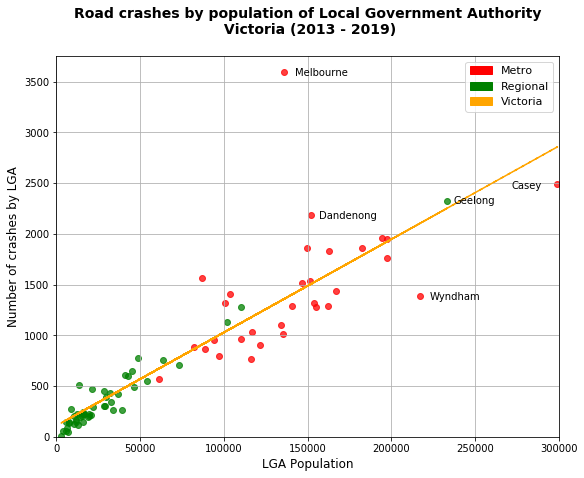

In [40]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Total_pop"], LGA_merged_metro["total_crashes"], facecolors=["red"], alpha = 0.75)
plt.scatter(LGA_merged_regional["Total_pop"], LGA_merged_regional["total_crashes"], facecolors=["green"], alpha = 0.75)
plt.plot(LGA_merged["Total_pop"], pop_summary_fit, "--", color="orange")

plt.xlabel("LGA Population", fontsize=12)
plt.ylabel("Number of crashes by LGA", fontsize=12)
plt.title("Road crashes by population of Local Government Authority\n Victoria (2013 - 2019)\n", fontsize=14, fontweight="bold")

metro_patch_legend_tp = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_tp = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_tp = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_tp, regional_patch_legend_tp, overall_patch_legend_tp], loc="upper right", fontsize=11)


plt.annotate('Melbourne',(142500,3560))
plt.annotate('Casey',(272000,2450))
plt.annotate('Wyndham',(223000,1350))
plt.annotate('Geelong',(237000,2300))
plt.annotate('Dandenong',(157000,2150))

plt.xlim(0,300000)
plt.ylim(0,3750)
plt.grid()
plt.show()

## Explore total crashes by LGA Index of Relative Socio-Economic Disadvantage (IRSD) - economic index

In [41]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["total_crashes"])[0], 2)

0.25

In [42]:
#BY METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Metro)
IRSD_slope_m, IRSD_int_m, IRSD_r_m, IRSD_p_m, IRSD_std_err_m = stats.linregress(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Metro)
IRSD_summary_fit_m = IRSD_slope_m * LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"] + IRSD_int_m

In [43]:
#BY REGIONAL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (regional)
IRSD_slope_r, IRSD_int_r, IRSD_r_r, IRSD_p_r, IRSD_std_err_r = stats.linregress(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (regional)
IRSD_summary_fit_r = IRSD_slope_r * LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"] + IRSD_int_r

In [44]:
#OVERALL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
IRSD_slope, IRSD_int, IRSD_r, IRSD_p, IRSD_std_err = stats.linregress(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA
IRSD_summary_fit = IRSD_slope * LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"] + IRSD_int

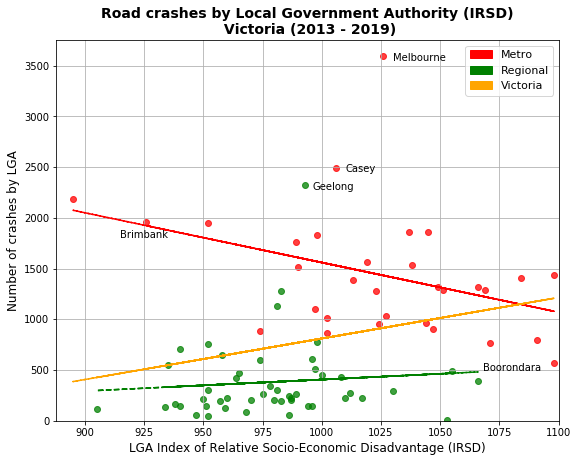

In [45]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["total_crashes"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["total_crashes"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], IRSD_summary_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], IRSD_summary_fit_r, "--", color="green")
plt.plot(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], IRSD_summary_fit, "--", color="orange")

plt.xlabel("LGA Index of Relative Socio-Economic Disadvantage (IRSD)", fontsize=12)
plt.ylabel("Number of crashes by LGA", fontsize=12)
plt.title("Road crashes by Local Government Authority (IRSD)\n Victoria (2013 - 2019)", fontsize=14, fontweight="bold")

metro_patch_legend_IRSD = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_IRSD = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_IRSD = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_IRSD, regional_patch_legend_IRSD, overall_patch_legend_IRSD], loc="upper right", fontsize=11)


plt.annotate('Melbourne',(1030,3550))
plt.annotate('Dandenong',(880, 2250))
plt.annotate('Boorondara',(1068, 493))
plt.annotate('Brimbank',(915, 1800))
plt.annotate('Casey',(1010, 2450))
plt.annotate('Geelong',(996, 2277))

plt.xlim(888,1100)
plt.ylim(0,3750)
plt.grid()
plt.show()

## Explore total crashes by each LGA's median income

In [46]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Median household income"], LGA_merged["total_crashes"])[0], 2)

0.54

In [47]:
#BY METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Metro)
med_income_slope_m, med_income_int_m, med_income_r_m, med_income_p_m, med_income_std_err_m = stats.linregress(LGA_merged_metro["Median household income"], LGA_merged_metro["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Metro)
med_income_fit_m = med_income_slope_m * LGA_merged_metro["Median household income"] + med_income_int_m

In [48]:
#BY REGIONAL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Regioanl)
med_income_slope_r, med_income_int_r, med_income_r_r, med_income_p_r, med_income_std_err_r = stats.linregress(LGA_merged_regional["Median household income"], LGA_merged_regional["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Regional)
med_income_fit_r = med_income_slope_r * LGA_merged_regional["Median household income"] + med_income_int_r

In [49]:
#OVERALL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Overall)
med_income_slope, med_income_int, med_income_r, med_income_p, med_income_std_err = stats.linregress(LGA_merged["Median household income"], LGA_merged["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Overall)
med_income_fit = med_income_slope * LGA_merged["Median household income"] + med_income_int

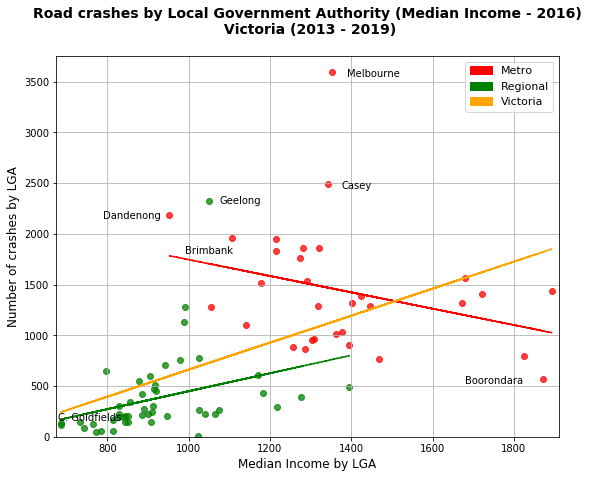

In [50]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Median household income"], LGA_merged_metro["total_crashes"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["Median household income"], LGA_merged_regional["total_crashes"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged_metro["Median household income"], med_income_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["Median household income"], med_income_fit_r, "--", color="green")
plt.plot(LGA_merged["Median household income"], med_income_fit, "--", color="orange")

plt.xlabel("Median Income by LGA", fontsize=12)
plt.ylabel("Number of crashes by LGA", fontsize=12)
plt.title("Road crashes by Local Government Authority (Median Income - 2016)\n Victoria (2013 - 2019)\n", fontsize=14, fontweight="bold")

metro_patch_legend_med = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_med = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_med = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_med, regional_patch_legend_med, overall_patch_legend_med], loc="upper right", fontsize=11)

plt.annotate('Melbourne',(1390,3550))
plt.annotate('Dandenong',(790, 2150))
plt.annotate('Boorondara',(1680, 525))
plt.annotate('Brimbank',(990, 1800))
plt.annotate('C. Goldfields',(680, 160))
plt.annotate('Casey',(1375, 2450))
plt.annotate('Geelong',(1075, 2300))

plt.xlim(675,1910)
plt.ylim(0,3750)
plt.grid()
plt.show()

## Number of alcohol incidents by socio economic status of LGA


In [51]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["alcohol"])[0], 2)

0.09

In [52]:
#Overall
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Overall)
booze_slope, booze_int, boze_r, booze_p, booze_std_err = stats.linregress(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["alcohol"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Overall)
booze_fit = booze_slope * LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"] + booze_int

In [53]:
#BY METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Metro)
booze_slope_m, booze_int_m, boze_r_m, booze_p_m, booze_std_err_m = stats.linregress(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["alcohol"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Metro)
booze_fit_m = booze_slope_m * LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"] + booze_int_m

In [54]:
#BY REGIONAL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Regional)
booze_slope_r, booze_int_r, boze_r_r, booze_p_r, booze_std_err_r = stats.linregress(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["alcohol"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Regional)
booze_fit_r = booze_slope_r * LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"] + booze_int_r

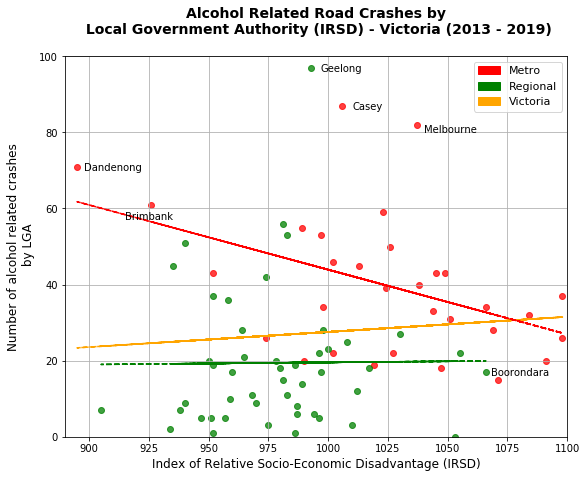

In [55]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["alcohol"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["alcohol"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], booze_fit, "--", color="orange")
plt.plot(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], booze_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], booze_fit_r, "--", color="green")

plt.xlabel("Index of Relative Socio-Economic Disadvantage (IRSD)", fontsize=12)
plt.ylabel("Number of alcohol related crashes\n by LGA", fontsize=12)
plt.title("Alcohol Related Road Crashes by\n Local Government Authority (IRSD) - Victoria (2013 - 2019)\n", fontsize=14, fontweight="bold")

metro_patch_legend_booze = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_booze = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_booze = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_booze, regional_patch_legend_booze, overall_patch_legend_booze], loc="upper right", fontsize=11)

plt.annotate('Melbourne',(1040,80))
plt.annotate('Dandenong',(898, 70))
plt.annotate('Boorondara',(1068, 16))
plt.annotate('Brimbank',(915, 57))
plt.annotate('C. Goldfields',(878, 9))
plt.annotate('Casey',(1010, 86))
plt.annotate('Geelong',(997, 96))


plt.xlim(890,1100)
plt.ylim(0,100)
plt.grid()
plt.show()

## Number of alcohol incidents by people reporting to be of fair or poor health in each LGA (Not used for the presentation)

In [56]:
#Calculate the correlation coefficient to see if there is a correlation between the health in a LGA and the number of crashes
round(st.pearsonr(LGA_merged["People reporting fair or poor health status"], LGA_merged["total_crashes"])[0], 2)

0.26

In [57]:
#OVERALL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
health_slope, health_int, health_r, health_p, health_std_err = stats.linregress(LGA_merged["People reporting fair or poor health status"], LGA_merged["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the people of fair or poor health in victoria by LGA
health_fit = health_slope * LGA_merged["People reporting fair or poor health status"] + health_int

In [58]:
#METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
health_slope_m, health_int_m, health_r_m, health_p_m, health_std_err_m = stats.linregress(LGA_merged_metro["People reporting fair or poor health status"], LGA_merged_metro["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the people of fair or poor health in victoria by LGA
health_fit_m = health_slope_m * LGA_merged_metro["People reporting fair or poor health status"] + health_int_m

In [59]:
#REGIONAL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
health_slope_r, health_int_r, health_r_r, health_p_r, health_std_err_r = stats.linregress(LGA_merged_regional["People reporting fair or poor health status"], LGA_merged_regional["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the people of fair or poor health in victoria by LGA
health_fit_r = health_slope_r * LGA_merged_regional["People reporting fair or poor health status"] + health_int_r

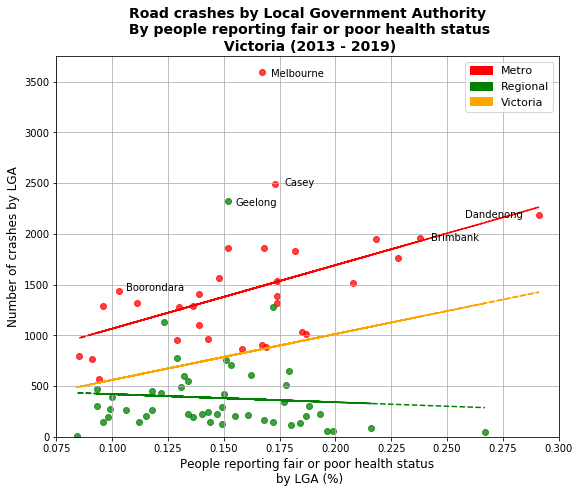

In [60]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["People reporting fair or poor health status"], LGA_merged_metro["total_crashes"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["People reporting fair or poor health status"], LGA_merged_regional["total_crashes"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged["People reporting fair or poor health status"], health_fit, "--", color="orange")
plt.plot(LGA_merged_metro["People reporting fair or poor health status"], health_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["People reporting fair or poor health status"], health_fit_r, "--", color="green")

plt.xlabel("People reporting fair or poor health status\n by LGA (%)", fontsize=12)
plt.ylabel("Number of crashes by LGA", fontsize=12)
plt.title("Road crashes by Local Government Authority\n By people reporting fair or poor health status\n Victoria (2013 - 2019)", fontsize=14, fontweight="bold")

metro_patch_legend_health = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_health = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_health = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_health, regional_patch_legend_health, overall_patch_legend_health], loc="upper right", fontsize=11)

plt.annotate('Melbourne',(0.171,3550))
plt.annotate('Dandenong',(.258, 2160))
plt.annotate('Boorondara',(0.106, 1440))
plt.annotate('Brimbank',(0.243, 1930))
plt.annotate('Casey',(0.177, 2470))
plt.annotate('Geelong',(0.155, 2280))

plt.xlim(0.075,.3)
plt.ylim(0,3750)
plt.grid()
plt.show()

## Represent the crashes per person in an LGA to see if there are more or less crashes per person (cpp) to socio factors

In [61]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["crash_per_person"])[0], 2)

-0.15

In [62]:
#OVERALL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Overall)
cpp_slope, cpp_int, cpp_r, cpp_p, cpp_std_err = stats.linregress(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["crash_per_person"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Overall)
cpp_fit = cpp_slope * LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"] + cpp_int

In [63]:
#METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Metro)
cpp_slope_m, cpp_int_m, cpp_r_m, cpp_p_m, cpp_std_err_m = stats.linregress(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["crash_per_person"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Metro)
cpp_fit_m = cpp_slope_m * LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"] + cpp_int_m

In [64]:
#REGIONAL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Regional)
cpp_slope_r, cpp_int_r, cpp_r_r, cpp_p_r, cpp_std_err_r = stats.linregress(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["crash_per_person"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Regional)
cpp_fit_r = cpp_slope_r * LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"] + cpp_int_r

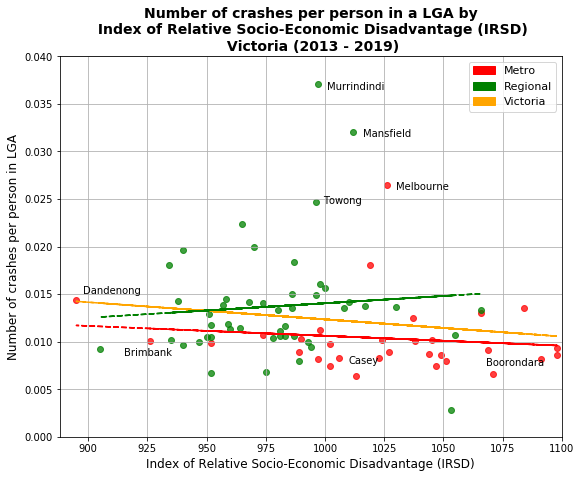

In [65]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["crash_per_person"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["crash_per_person"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], cpp_fit, "--", color="orange")
plt.plot(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], cpp_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], cpp_fit_r, "--", color="green")

plt.xlabel("Index of Relative Socio-Economic Disadvantage (IRSD)", fontsize=12)
plt.ylabel("Number of crashes per person in LGA", fontsize=12)
plt.title("Number of crashes per person in a LGA by\n Index of Relative Socio-Economic Disadvantage (IRSD)\n Victoria (2013 - 2019)", fontsize=14, fontweight="bold")

metro_patch_legend_cpp = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_cpp = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_cpp = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_cpp, regional_patch_legend_cpp, overall_patch_legend_cpp], loc="upper right", fontsize=11)

plt.annotate('Melbourne',(1030,0.026))
plt.annotate('Dandenong',(898, 0.015))
plt.annotate('Boorondara',(1068, 0.0075))
plt.annotate('Brimbank',(915, 0.0085))
plt.annotate('C. Goldfields',(876, .0077))
plt.annotate('Casey',(1010, 0.0077))
plt.annotate('Murrindindi',(1001, 0.0365))
plt.annotate('Mansfield',(1016, 0.0315))
plt.annotate('Towong',(999, 0.0245))

plt.xlim(888,1100)
plt.ylim(0,0.04)
plt.grid()
plt.show()

## Represent the crashes per person in an LGA to see if there are more or less crashes per person (cpp) for LGA alcohol factors

In [66]:
#Calculate the correlation coefficient to see if there is a correlation between alcohol related incidents
#and the number of crashes person (OVERALL)
round(st.pearsonr(LGA_merged["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], LGA_merged["crash_per_person"])[0], 2)

-0.14

In [67]:
#OVERALL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Overall)
cpp_alcohol_slope, cpp_alcohol_int, cpp_alcohol_r, cpp_alcohol_p, cpp_alcohol_std_err = stats.linregress(LGA_merged["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], LGA_merged["crash_per_person"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Overall)
cpp_alcohol_fit = cpp_alcohol_slope * LGA_merged["Clients that received Alcohol & Drug Treatment Services per 1,000 population"] + cpp_alcohol_int

In [68]:
#METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Metro)
cpp_alcohol_slope_m, cpp_alcohol_int_m, cpp_alcohol_r_m, cpp_alcohol_p_m, cpp_alcohol_std_err_m = stats.linregress(LGA_merged_metro["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], LGA_merged_metro["crash_per_person"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Metro)
cpp_alcohol_fit_m = cpp_alcohol_slope_m * LGA_merged_metro["Clients that received Alcohol & Drug Treatment Services per 1,000 population"] + cpp_alcohol_int_m

In [69]:
#METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Regional)
cpp_alcohol_slope_r, cpp_alcohol_int_r, cpp_alcohol_r_r, cpp_alcohol_p_r, cpp_alcohol_std_err_r = stats.linregress(LGA_merged_regional["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], LGA_merged_regional["crash_per_person"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Regional)
cpp_alcohol_fit_r = cpp_alcohol_slope_r * LGA_merged_regional["Clients that received Alcohol & Drug Treatment Services per 1,000 population"] + cpp_alcohol_int_r

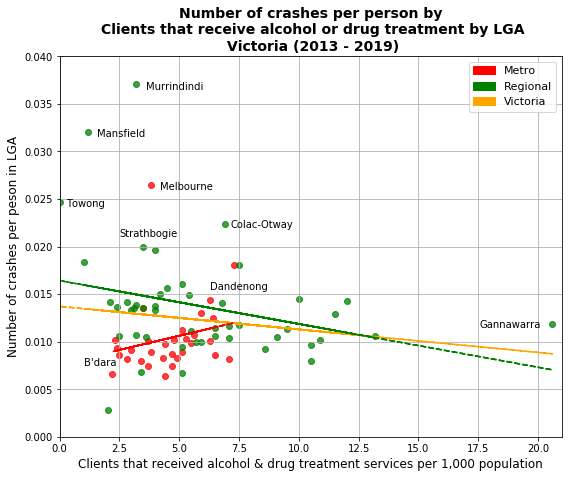

In [70]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], LGA_merged_metro["crash_per_person"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], LGA_merged_regional["crash_per_person"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], cpp_alcohol_fit, "--", color="orange")
plt.plot(LGA_merged_metro["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], cpp_alcohol_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], cpp_alcohol_fit_r, "--", color="green")

plt.xlabel("Clients that received alcohol & drug treatment services per 1,000 population", fontsize=12)
plt.ylabel("Number of crashes per peson in LGA", fontsize=12)
plt.title("Number of crashes per person by\n Clients that receive alcohol or drug treatment by LGA\n Victoria (2013 - 2019)", fontsize=14, fontweight="bold")

metro_patch_legend_cpp_alc = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_cpp_alc = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_cpp_alc = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_cpp_alc, regional_patch_legend_cpp_alc, overall_patch_legend_cpp_alc], loc="upper right", fontsize=11)

plt.annotate('Melbourne',(4.2,0.026))
plt.annotate('Dandenong',(6.3, 0.0155))
plt.annotate("B'dara",(1, 0.0075))
plt.annotate('Mansfield',(1.55, 0.0315))
plt.annotate('Gannawarra',(17.55, 0.0115))
plt.annotate('Murrindindi',(3.6, 0.0365))
plt.annotate('Colac-Otway',(7.15, 0.022))
plt.annotate('Strathbogie',(2.5, 0.021))
plt.annotate('Towong',(0.249, 0.0242))


plt.xlim(0,21)
plt.ylim(0,0.04)
plt.grid()
plt.show()

## Work out overall statistics - by age and gender classifications (Young, Older, Middle Aged)

In [71]:
#Group data to calculate the number of crashes per region (excluding alcohol related crashes)
region_crash_count2 = LGA_merged.groupby(["Departmental Region", "City_Regional"])["total_crashes"].sum()
region_total_injuries = LGA_merged.groupby(["Departmental Region", "City_Regional"])["total_inj"].sum()
region_total_fatal = LGA_merged.groupby(["Departmental Region", "City_Regional"])["fatal"].sum()
region_total_male = LGA_merged.groupby(["Departmental Region", "City_Regional"])["male"].sum()
region_total_female = LGA_merged.groupby(["Departmental Region", "City_Regional"])["female"].sum()
region_total_old = LGA_merged.groupby(["Departmental Region", "City_Regional"])["old_driver"].sum()
region_total_young = LGA_merged.groupby(["Departmental Region", "City_Regional"])["young_driver"].sum()


In [72]:
#Create a new grouped dataframe 
grouped_LGA_demos = pd.DataFrame({"total_crashes2": region_crash_count2,
                                  "total_inj": region_total_injuries,
                                  "fatal": region_total_fatal,
                                  "inj_male": region_total_male,
                                   "inj_female": region_total_female,
                                   "old_driver": region_total_old,
                                   "young_driver": region_total_young,
                                   })

In [87]:
#Have a look at the condensed df
grouped_LGA_demos

,,total_crashes2,total_inj,fatal,inj_male,inj_female,old_driver,young_driver,inj_per_crash,male_%,female_%,older_%,young_%
Departmental Region,City_Regional,,,,,,,,,,,,
Barwon-South Western,Regional,4299,10328,130,5529,4341,340,1411,2.402419,0.535341,0.420314,0.079088,0.328216
Eastern Metropolitan,Metro,9491,23029,122,12269,9729,765,3108,2.426404,0.532763,0.422467,0.080603,0.327468
Gippsland,Regional,3532,7169,121,4167,2794,234,959,2.029728,0.581253,0.389734,0.066251,0.271518
Grampians,Regional,2883,6407,114,3533,2629,206,878,2.222338,0.551428,0.410332,0.071453,0.304544
Hume,Regional,4016,8182,185,4897,2983,248,990,2.037351,0.598509,0.364581,0.061753,0.246514
Loddon Mallee,Regional,3631,7936,130,4416,3263,303,1065,2.185624,0.556452,0.411164,0.083448,0.293308
Northern Metropolitan,Metro,10097,24854,93,13681,9749,513,3102,2.461523,0.550455,0.392251,0.050807,0.307220
Southern Metropolitan,Metro,14361,35660,194,19285,14516,1056,4395,2.483114,0.540802,0.407067,0.073532,0.306037
Western Metropolitan,Metro,10727,26969,138,15289,10075,401,3075,2.514123,0.566910,0.373577,0.037382,0.286660


In [74]:
#Calculate some additional ratios 
#Total injuries per crash
grouped_LGA_demos["inj_per_crash"] = grouped_LGA_demos["total_inj"] / grouped_LGA_demos["total_crashes2"]

#% Male injuries
grouped_LGA_demos["male_%"] = grouped_LGA_demos["inj_male"] / grouped_LGA_demos["total_inj"]

#% Female injuries
grouped_LGA_demos["female_%"] = grouped_LGA_demos["inj_female"] / grouped_LGA_demos["total_inj"]

#% Total Crashes involving an older person driver
grouped_LGA_demos["older_%"] = grouped_LGA_demos["old_driver"] / grouped_LGA_demos["total_crashes2"]

#% Total Crashes involving an older person driver
grouped_LGA_demos["young_%"] = grouped_LGA_demos["young_driver"] / grouped_LGA_demos["total_crashes2"]


In [75]:
grouped_LGA_demos

,,total_crashes2,total_inj,fatal,inj_male,inj_female,old_driver,young_driver,inj_per_crash,male_%,female_%,older_%,young_%
Departmental Region,City_Regional,,,,,,,,,,,,
Barwon-South Western,Regional,4299,10328,130,5529,4341,340,1411,2.402419,0.535341,0.420314,0.079088,0.328216
Eastern Metropolitan,Metro,9491,23029,122,12269,9729,765,3108,2.426404,0.532763,0.422467,0.080603,0.327468
Gippsland,Regional,3532,7169,121,4167,2794,234,959,2.029728,0.581253,0.389734,0.066251,0.271518
Grampians,Regional,2883,6407,114,3533,2629,206,878,2.222338,0.551428,0.410332,0.071453,0.304544
Hume,Regional,4016,8182,185,4897,2983,248,990,2.037351,0.598509,0.364581,0.061753,0.246514
Loddon Mallee,Regional,3631,7936,130,4416,3263,303,1065,2.185624,0.556452,0.411164,0.083448,0.293308
Northern Metropolitan,Metro,10097,24854,93,13681,9749,513,3102,2.461523,0.550455,0.392251,0.050807,0.307220
Southern Metropolitan,Metro,14361,35660,194,19285,14516,1056,4395,2.483114,0.540802,0.407067,0.073532,0.306037
Western Metropolitan,Metro,10727,26969,138,15289,10075,401,3075,2.514123,0.566910,0.373577,0.037382,0.286660


In [76]:
#Sort by young driver %
region_plot = grouped_LGA_demos.copy()
region_plot.reset_index()

,Departmental Region,City_Regional,total_crashes2,total_inj,fatal,inj_male,inj_female,old_driver,young_driver,inj_per_crash,male_%,female_%,older_%,young_%
0,Barwon-South Western,Regional,4299,10328,130,5529,4341,340,1411,2.402419,0.535341,0.420314,0.079088,0.328216
1,Eastern Metropolitan,Metro,9491,23029,122,12269,9729,765,3108,2.426404,0.532763,0.422467,0.080603,0.327468
2,Gippsland,Regional,3532,7169,121,4167,2794,234,959,2.029728,0.581253,0.389734,0.066251,0.271518
3,Grampians,Regional,2883,6407,114,3533,2629,206,878,2.222338,0.551428,0.410332,0.071453,0.304544
4,Hume,Regional,4016,8182,185,4897,2983,248,990,2.037351,0.598509,0.364581,0.061753,0.246514
5,Loddon Mallee,Regional,3631,7936,130,4416,3263,303,1065,2.185624,0.556452,0.411164,0.083448,0.293308
6,Northern Metropolitan,Metro,10097,24854,93,13681,9749,513,3102,2.461523,0.550455,0.392251,0.050807,0.307220
7,Southern Metropolitan,Metro,14361,35660,194,19285,14516,1056,4395,2.483114,0.540802,0.407067,0.073532,0.306037
8,Western Metropolitan,Metro,10727,26969,138,15289,10075,401,3075,2.514123,0.566910,0.373577,0.037382,0.286660


In [77]:
#Calculate the average % of crashes involving young people for plotting
average_region_young = float(region_plot["young_%"].mean())
print("Ave young person % of crashes per region: ", average_region_young)

Ave young person % of crashes per region:  0.29683155302557246


In [78]:
#Overall stats for reporting
region_plot.describe()

,total_crashes2,total_inj,fatal,inj_male,inj_female,old_driver,young_driver,inj_per_crash,male_%,female_%,older_%,young_%
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,7004.111111,16726.000000,136.333333,9229.555556,6675.444444,451.777778,2109.222222,2.306958,0.557101,0.399054,0.067147,0.296832
std,4189.237981,10944.313866,32.775753,5922.394894,4387.056419,285.811904,1313.876115,0.191261,0.021801,0.020337,0.015131,0.026135
min,2883.000000,6407.000000,93.000000,3533.000000,2629.000000,206.000000,878.000000,2.029728,0.532763,0.364581,0.037382,0.246514
25%,3631.000000,7936.000000,121.000000,4416.000000,2983.000000,248.000000,990.000000,2.185624,0.540802,0.389734,0.061753,0.286660
50%,4299.000000,10328.000000,130.000000,5529.000000,4341.000000,340.000000,1411.000000,2.402419,0.551428,0.407067,0.071453,0.304544
75%,10097.000000,24854.000000,138.000000,13681.000000,9749.000000,513.000000,3102.000000,2.461523,0.566910,0.411164,0.079088,0.307220
max,14361.000000,35660.000000,194.000000,19285.000000,14516.000000,1056.000000,4395.000000,2.514123,0.598509,0.422467,0.083448,0.328216


In [79]:
#Group data to calculate the number of crashes per region (excluding alcohol related crashes)
region_crash_count3 = LGA_merged.groupby(["City_Regional"])["total_crashes"].sum()
region_total_injuries3 = LGA_merged.groupby(["City_Regional"])["total_inj"].sum()
region_total_fatal3 = LGA_merged.groupby(["City_Regional"])["fatal"].sum()
region_total_male3 = LGA_merged.groupby(["City_Regional"])["male"].sum()
region_total_female3 = LGA_merged.groupby(["City_Regional"])["female"].sum()
region_total_old3 = LGA_merged.groupby(["City_Regional"])["old_driver"].sum()
region_total_young3 = LGA_merged.groupby(["City_Regional"])["young_driver"].sum()
region_total_pop3 = LGA_merged.groupby(["City_Regional"])["Total_pop"].sum()

In [80]:
#Create a new grouped dataframe 
grouped_city_or_regional = pd.DataFrame({"total_crashes": region_crash_count3,
                                  "total_inj": region_total_injuries3,
                                  "fatal": region_total_fatal3,       
                                  "inj_male": region_total_male3,
                                   "inj_female": region_total_female3,
                                   "old_driver": region_total_old3,
                                   "young_driver": region_total_young3,
                                   "total_pop": region_total_pop3
})

In [81]:
grouped_city_or_regional

,total_crashes,total_inj,fatal,inj_male,inj_female,old_driver,young_driver,total_pop
City_Regional,,,,,,,,
Metro,44676,110512,547,60524,44069,2735,13680,4415403
Regional,18361,40022,680,22542,16010,1331,5303,1502734


In [82]:
#Calculate some additional ratios 
#Total injuries per crash
grouped_city_or_regional["inj_per_crash"] = grouped_city_or_regional["total_inj"] / grouped_city_or_regional["total_crashes"]

#% Male injuries
grouped_city_or_regional["male_%"] = grouped_city_or_regional["inj_male"] / grouped_city_or_regional["total_inj"]

#% Female injuries
grouped_city_or_regional["female_%"] = grouped_city_or_regional["inj_female"] / grouped_city_or_regional["total_inj"]

#% Total Crashes involving an older person driver
grouped_city_or_regional["older_%"] = grouped_city_or_regional["old_driver"] / grouped_city_or_regional["total_crashes"]

#% Total Crashes involving an older person driver
grouped_city_or_regional["young_%"] = grouped_city_or_regional["young_driver"] / grouped_city_or_regional["total_crashes"]

#split of fatalities to metro / regional
grouped_city_or_regional["percent_fatal"] = grouped_city_or_regional["fatal"] / (grouped_city_or_regional["fatal"].sum())


In [83]:
#Calculate the Metro / Regional split of accidents for high level analysis
grouped_city_or_regional["percent_crashes"] = grouped_city_or_regional["total_crashes"] / (grouped_city_or_regional["total_crashes"].sum())

In [84]:
#Calculate the Metro / Regional split of population for high level analysis
grouped_city_or_regional["percent_pop"] = grouped_city_or_regional["total_pop"] / (grouped_city_or_regional["total_pop"].sum())

In [85]:
grouped_city_or_regional

,total_crashes,total_inj,fatal,inj_male,inj_female,old_driver,young_driver,total_pop,inj_per_crash,male_%,female_%,older_%,young_%,percent_fatal,percent_crashes,percent_pop
City_Regional,,,,,,,,,,,,,,,,
Metro,44676,110512,547,60524,44069,2735,13680,4415403,2.473632,0.547669,0.398771,0.061219,0.306205,0.445803,0.708727,0.74608
Regional,18361,40022,680,22542,16010,1331,5303,1502734,2.179729,0.563240,0.400030,0.072491,0.288819,0.554197,0.291273,0.25392


In [91]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
grouped_city_or_regional.to_csv("groupedregional.csv", encoding="utf-8", index=False)

Text(0.5, 1.0, '% of Accidents in Victoria\n Metro or Regional\n 2013-2019')

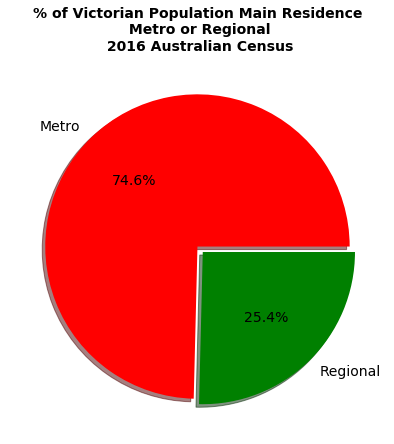

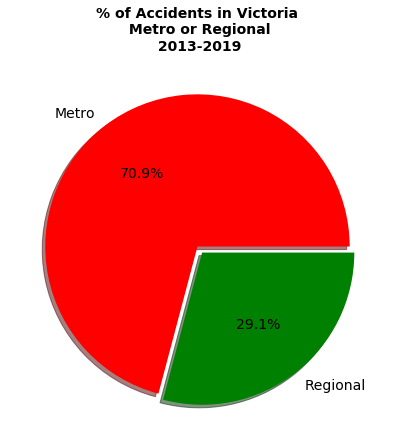

In [86]:
#Do a pie chart to show the % of Victorian accidents and where
#Setup the pie chart
colors = ["red", "green"]
labels = ["Metro", "Regional"]
explode = (0, 0.05)

#Plot the pie charts - population
plt.figure(figsize=(9,7))
plt.pie(grouped_city_or_regional["percent_pop"], colors=colors, autopct="%1.1f%%", shadow=True, labels=labels, explode=explode, textprops={'fontsize': 14})

plt.title("% of Victorian Population Main Residence\n Metro or Regional\n 2016 Australian Census", fontsize=14, fontweight="bold")

#Plot the pie charts - accidents
plt.figure(figsize=(9,7))
plt.pie(grouped_city_or_regional["percent_crashes"], colors=colors, autopct="%1.1f%%", shadow=True, labels=labels, explode=explode, textprops={'fontsize': 14})

plt.title("% of Accidents in Victoria\n Metro or Regional\n 2013-2019", fontsize=14, fontweight="bold")

